In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from api_import import *
#import api_import 

In [18]:
#data = np.genfromtxt("2013_gaz_tracts_36.txt",delimiter=",",)
data = pd.read_csv("../data/gazetter_tracts/2013_gaz_tracts_36.txt",header=0,dtype={'GEOID': np.int64, 
        'ALAND': float, 'AWATER': float, 'ALAND_SQMI': float, 'AWATER_SQMI': float, 
        'INTPTLAT': float, 'INTPTLONG': float})

In [19]:
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264


In [20]:
#add state, county, county, tract id, block id information to data frame
data['STATE'] = ''
data['STATE_ID'] = ''
data['GEOID'] = data['GEOID'].astype("str")
data['BOROUGH'] = ''
data['COUNTY_ID'] = ''
data['TRACT_ID'] = ''
data['LATMIN'] = 0.0
data['LATMAX'] = 0.0
data['LONGMIN'] = 0.0
data['LONGMAX'] = 0.0
data['ZIPCODE'] = ''
data['FRAC_LAND'] = data['ALAND'] / (data['ALAND'] + data['AWATER'])

## ---IGNORING ZIP CODES SINCE THEY ARE MAIL ROUTES AND NOT ALWAYS MAPPED CORRECTLY TO TRACT + COUNTY CODE COMBINATIONS

In [21]:
#ziplist = zip_tract_dict.keys() #if y[0] == '61']
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909,,,,,,0,0,0,0,,0.906211
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504,,,,,,0,0,0,0,,1.000000
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004,,,,,,0,0,0,0,,0.990518
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753,,,,,,0,0,0,0,,0.985342
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264,,,,,,0,0,0,0,,1.000000


In [22]:
#function to parse GEOID
def parse_geoid(geoidstr):
    return geoidstr[:2],geoidstr[2:5],geoidstr[5:]

In [23]:
#http://msi.nga.mil/MSISiteContent/StaticFiles/Calculators/degree.html to get meters->lat, long
#latitude (NYC) = 40.7 degrees
#1 degree of latitude = 111048 meters
#1 degree of longitude = 84515 meters 
for irow, row in data.iterrows():
    state, county, tract =  parse_geoid(row['GEOID'])
    data.ix[irow,'STATE_ID'] = state
    data.ix[irow,'COUNTY_ID'] = county
    data.ix[irow,'TRACT_ID'] = tract
    #data.ix[irow,'BLOCK_ID'] = block
    length = np.sqrt(row['ALAND'] + row['AWATER'])  #in meters
    dlat = 0.5 * length * (1./111048.)
    dlon = 0.5 * length * (1./84515.)
    data.ix[irow,'LATMIN'], data.ix[irow,'LATMAX'] = row['INTPTLAT'] - dlat, row['INTPTLAT'] + dlat
    data.ix[irow,'LONGMIN'], data.ix[irow,'LONGMAX'] = row['INTPTLONG'] - dlon, row['INTPTLONG'] + dlon

In [24]:
data.loc[data.COUNTY_ID == "061","BOROUGH"] = "Manhattan"
data.loc[data.COUNTY_ID == "047","BOROUGH"] = "Brooklyn"
data.loc[data.COUNTY_ID == "081","BOROUGH"] = "Queens"
data.loc[data.COUNTY_ID == "085","BOROUGH"] = "Staten"
data.loc[data.COUNTY_ID == "005","BOROUGH"] = "Bronx"
data.BOROUGH.unique()

array(['', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten'], dtype=object)

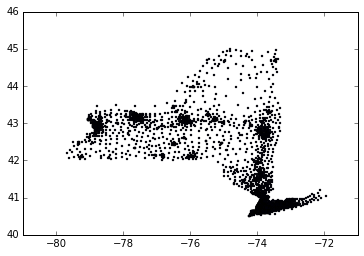

In [25]:
#plot of new york from census tracts
plt.scatter(data['INTPTLONG'],data['INTPTLAT'],s=2)

In [26]:
#Create subsets for nyc 5 boroughs and for manhattan only
nyc = data[(data['COUNTY_ID'] == "061") | (data['COUNTY_ID'] == "047") | 
           (data['COUNTY_ID'] == "005") | (data['COUNTY_ID'] == "081") | 
           (data['COUNTY_ID'] == "085")].reset_index(drop=True)

In [27]:
nyc.head()

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36005000100,1672467,1032658,0.646,0.399,40.793492,-73.883532,,36,Bronx,005,000100,40.786087,40.800898,-73.893262,-73.873801,,0.618259
1,NY,36005000200,455322,926899,0.176,0.358,40.803486,-73.860438,,36,Bronx,005,000200,40.798192,40.808779,-73.867393,-73.853482,,0.329413
2,NY,36005000400,912391,602945,0.352,0.233,40.808915,-73.850488,,36,Bronx,005,000400,40.803373,40.814458,-73.857771,-73.843206,,0.602105
3,NY,36005001600,485079,0,0.187,0.000,40.818848,-73.858076,,36,Bronx,005,001600,40.815712,40.821984,-73.862197,-73.853956,,1.000000
4,NY,36005001900,1656134,1139660,0.639,0.440,40.800999,-73.909373,,36,Bronx,005,001900,40.793470,40.808528,-73.919265,-73.899481,,0.592366


In [28]:
nyc.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [29]:
#zip_tract_dict = zip_to_tract()
tract_zip_dict = tract_to_zip()
for irow, row in nyc.iterrows():
    if irow in tract_zip_dict.keys():
        nyc.ix[irow,'ZIPCODE'] = tract_zip_dict[irow]
    else:
        nyc.ix[irow,'ZIPCODE'] = "00000"

In [30]:
nyc.head(5)

USPS        GEOID    ALAND   AWATER  ALAND_SQMI  \
COUNTY_ID TRACT_ID                                                   
005       000100     NY  36005000100  1672467  1032658       0.646   
          000200     NY  36005000200   455322   926899       0.176   
          000400     NY  36005000400   912391   602945       0.352   
          001600     NY  36005001600   485079        0       0.187   
          001900     NY  36005001900  1656134  1139660       0.639   

                    AWATER_SQMI   INTPTLAT  INTPTLONG STATE STATE_ID BOROUGH  \
COUNTY_ID TRACT_ID                                                             
005       000100          0.399  40.793492 -73.883532             36   Bronx   
          000200          0.358  40.803486 -73.860438             36   Bronx   
          000400          0.233  40.808915 -73.850488             36   Bronx   
          001600          0.000  40.818848 -73.858076             36   Bronx   
          001900          0.440  40.800999 -73.909373             36   Bronx   

                       LATMIN     LATMAX    LONGMIN    LONGMAX ZIPCODE  \
COUNTY_ID TRACT_ID                                                       
005       000100    40.786087  40.800898 -73.893262 -73.873801   11370   
          000200    40.798192  40.808779 -73.867393 -73.853482   10473   
          000400    40.803373  40.814458 -73.857771 -73.843206   10473   
          001600    40.815712  40.821984 -73.862197 -73.853956   10473   
          001900    40.793470  40.808528 -73.919265 -73.899481   10455   

                    FRAC_LAND  
COUNTY_ID TRACT_ID             
005       000100     0.618259  
          000200     0.329413  
          000400     0.602105  
          001600     1.000000  
          001900     0.592366

In [31]:
#manhattan = nyc.iloc(nyc['COUNTY_ID'] == "061",:]
manhattan = nyc.ix["061"]

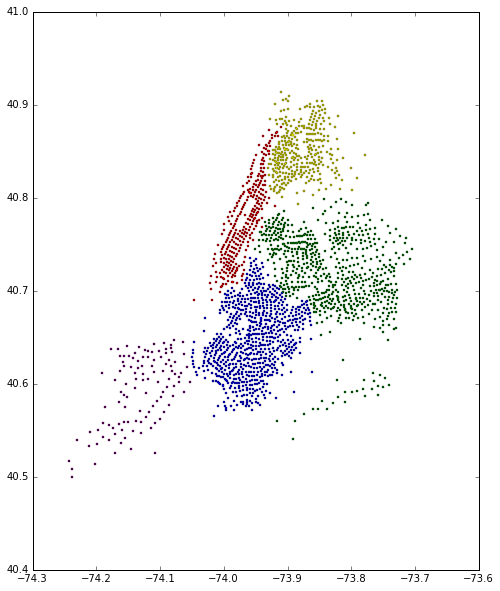

In [32]:
#Plot of NYC color-coded by borough! 
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (8,10)
plt.scatter(nyc['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(nyc.ix["061"]['INTPTLONG'],nyc.ix["061"]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(nyc.ix["047"]['INTPTLONG'],nyc.ix["047"]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(nyc.ix["081"]['INTPTLONG'],nyc.ix["081"]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(nyc.ix["085"]['INTPTLONG'],nyc.ix["085"]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(nyc.ix["005"]['INTPTLONG'],nyc.ix["005"]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

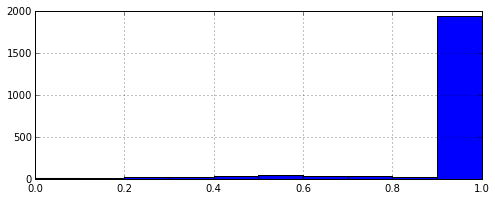

In [33]:
#Fraction of NYC census tracts that are 100% over land = 90%
mpl.rcParams["figure.figsize"] = (8,3)
nyc['FRAC_LAND'].hist(bins=10)

In [34]:
print "fraction of tract census areas 90% land = ",float(len(nyc[nyc['FRAC_LAND'] > 0.90]))/len(nyc['FRAC_LAND'])

fraction of tract census areas 90% land =  0.897092754961


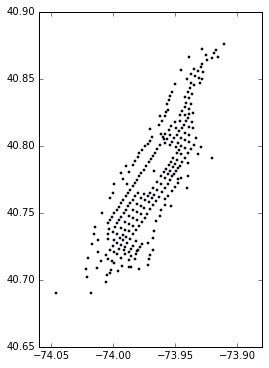

In [35]:
mpl.rcParams["figure.figsize"] = (4,6)
plt.scatter(manhattan['INTPTLONG'],manhattan['INTPTLAT'],s=3)

In [36]:
#print manhattan[:,['LONGMIN','LONGMAX','LATMIN','LATMAX']]
print manhattan.index

Index([u'000100', u'000201', u'000202', u'000500', u'000600', u'000700', u'000800', u'000900', u'001001', u'001002', u'001200', u'001300', u'001401', u'001402', u'001501', u'001502', u'001600', u'001800', u'002000', u'002100', u'002201', u'002202', u'002400', u'002500', u'002601', u'002602', u'002700', u'002800', u'002900', u'003001', u'003002', u'003100', u'003200', u'003300', u'003400', u'003601', u'003602', u'003700', u'003800', u'003900', u'004000', u'004100', u'004200', u'004300', u'004400', u'004500', u'004700', u'004800', u'004900', u'005000', u'005200', u'005400', u'005501', u'005502', u'005600', u'005700', u'005800', u'005900', u'006000', u'006100', u'006200', u'006300', u'006400', u'006500', u'006600', u'006700', u'006800', u'006900', u'007000', u'007100', u'007200', u'007300', u'007400', u'007500', u'007600', u'007700', u'007800', u'007900', u'008000', u'008100', u'008200', u'008300', u'008400', u'008601', u'008602', u'008603', u'008700', u'008800', u'008900', u'009000', u'0

In [37]:
#--------------------------

###Combine Geographical Data with Population, Economic, Demographic Data

In [38]:
#specify features in census database
census_vars = [["cty", {"description": "County", "name": "COUNTY_ID"}],
               ["tr", {"description": "Tract", "name": "TRACT_ID"}],
["DP03_0051E", {"description": "Total households", "name": "hh_total"}],
["DP03_0052E" , {"description": "Total households < 10,000","name": "hh1"}],
["DP03_0053E" , {"description": "Total households 10,000 to 14,999","name": "hh2"}],
["DP03_0054E" , {"description": "Total households 15,000 to 24,999","name": "hh3"}],
["DP03_0055E" , {"description": "Total households 25,000 to 34,999","name": "hh4"}],
["DP03_0056E" , {"description": "Total households 35,000 to 49,999","name": "hh5"}],
["DP03_0057E" , {"description": "Total households 50,000 to 74,999","name": "hh6"}],
["DP03_0058E" , {"description": "Total households 75,000 to 99,999","name": "hh7"}],
["DP03_0059E" , {"description": "Total households 100,000 to 149,999","name": "hh8"}],
["DP03_0060E" , {"description": "Total households 150,000 to 199,999","name": "hh9"}],
["DP03_0061E" , {"description": "Total households 200,000 + ","name": "hh10"}],
["DP03_0062E" , {"description": "Total households MEDIAN income","name": "hhmedian"}], #dollars
["DP03_0063E" , {"description": "Total households MEAN income","name": "hhmean"}],   #dollars
["DP04_0088E" , {"description": "Median Value Owner Occupied Units","name": "median_owned"}],
["DP04_0132E" , {"description": "Median Gross Rent","name": "median_rent"}],
["DP05_0001E" , {"description": "Total population","name": "pop_total"}],
["DP05_0004E" , {"description": "Total population less than 5 years old","name": "pop1"}],
["DP05_0005E" , {"description": "Total population 5 to 9 years old","name": "pop2"}],
["DP05_0006E" , {"description": "Total population 10 to 14 years old","name": "pop3"}],
["DP05_0007E" , {"description": "Total population 15 to 19 years old","name": "pop4"}],
["DP05_0008E" , {"description": "Total population 20 to 24 years old","name": "pop5"}],
["DP05_0009E" , {"description": "Total population 25 to 34 years old","name": "pop6"}],
["DP05_0010E" , {"description": "Total population 35 to 44 years old","name": "pop7"}],
["DP05_0011E" , {"description": "Total population 45 to 54 years old","name": "pop8"}],
["DP05_0012E" , {"description": "Total population 55 to 59 years old","name": "pop9"}],
["DP05_0013E" , {"description": "Total population 60 to 64 years old","name": "pop10"}],
["DP05_0014E" , {"description": "Total population 65 to 74 years old","name": "pop11"}],
["DP05_0015E" , {"description": "Total population 75 to 84 years old","name": "pop12"}],
["DP05_0016E" , {"description": "Total population 85+","name": "pop13"}],
["DP05_0039E" , {"description": "Race: Asian","name": "pop_asian"}],
["DP05_0033E" , {"description": "Race: African American","name": "pop_black"}],
["DP05_0032E" , {"description": "Race: White","name": "pop_white"}],
["DP05_0034E" , {"description": "Race: Native American","name": "pop_native"}],
["DP05_0047E" , {"description": "Race: Native Hawaiian and Other Pacific Islander","name": "pop_pacific"}],
["DP05_0066E" , {"description": "Hispanic and Latino of any race","name": "pop_latino"}],
["DP05_0067E" , {"description": "Ethnicity: Mexican","name": "pop_mexican"}],
["DP05_0068E" , {"description": "Ethnicity: Puerto Rican","name": "pop_puertorican"}],
["DP05_0069E" , {"description": "Ethnicity: Cuban","name": "pop_cuban"}],
["DP05_0040E" , {"description": "Ethnicity: Indian/Pakistani","name": "pop_indpak"}],
["DP05_0041E" , {"description": "Ethnicity: Chinese","name": "pop_chinese"}],
["DP05_0042E" , {"description": "Ethnicity: Filipino","name": "pop_filipino"}],
["DP05_0043E" , {"description": "Ethnicity: Japanese","name": "pop_japanese"}],
["DP05_0044E" , {"description": "Ethnicity: Korean","name": "pop_korean"}],
["DP05_0045E" , {"description": "Ethnicity: Vietnamese","name": "pop_vietnamese"}],
["DP02_0132E" , {"description": "Ancestry: Greek","name": "pop_greek"}],  #note ancestry vs ethnicity in census data
["DP02_0134E" , {"description": "Ancestry: Irish","name": "pop_irish"}],  #note ancestry vs ethnicity in census data
["DP02_0135E" , {"description": "Ancestry: Italian","name": "pop_italian"}],  #note ancestry vs ethnicity in census data
["DP02_0138E" , {"description": "Ancestry: Polish","name": "pop_polish"}],  #note ancestry vs ethnicity in census data
["DP02_0139E" , {"description": "Ancestry: Portuguese","name": "pop_portuguese"}],  #note ancestry vs ethnicity in census data
["DP02_0140E" , {"description": "Ancestry: Russian","name": "pop_russian"}]]  #note ancestry vs ethnicity in census data

census_vars_keys = [x[0] for x in census_vars]
census_vars_names = [x[1]["name"] for x in census_vars]

print census_vars_keys
print census_vars_names

['cty', 'tr', 'DP03_0051E', 'DP03_0052E', 'DP03_0053E', 'DP03_0054E', 'DP03_0055E', 'DP03_0056E', 'DP03_0057E', 'DP03_0058E', 'DP03_0059E', 'DP03_0060E', 'DP03_0061E', 'DP03_0062E', 'DP03_0063E', 'DP04_0088E', 'DP04_0132E', 'DP05_0001E', 'DP05_0004E', 'DP05_0005E', 'DP05_0006E', 'DP05_0007E', 'DP05_0008E', 'DP05_0009E', 'DP05_0010E', 'DP05_0011E', 'DP05_0012E', 'DP05_0013E', 'DP05_0014E', 'DP05_0015E', 'DP05_0016E', 'DP05_0039E', 'DP05_0033E', 'DP05_0032E', 'DP05_0034E', 'DP05_0047E', 'DP05_0066E', 'DP05_0067E', 'DP05_0068E', 'DP05_0069E', 'DP05_0040E', 'DP05_0041E', 'DP05_0042E', 'DP05_0043E', 'DP05_0044E', 'DP05_0045E', 'DP02_0132E', 'DP02_0134E', 'DP02_0135E', 'DP02_0138E', 'DP02_0139E', 'DP02_0140E']
['COUNTY_ID', 'TRACT_ID', 'hh_total', 'hh1', 'hh2', 'hh3', 'hh4', 'hh5', 'hh6', 'hh7', 'hh8', 'hh9', 'hh10', 'hhmedian', 'hhmean', 'median_owned', 'median_rent', 'pop_total', 'pop1', 'pop2', 'pop3', 'pop4', 'pop5', 'pop6', 'pop7', 'pop8', 'pop9', 'pop10', 'pop11', 'pop12', 'pop13', 'po

In [39]:
bronx_df = query_census(census_vars_keys, "05")
manhattan_df = query_census(census_vars_keys, "61")
queens_df = query_census(census_vars_keys, "81")
brooklyn_df = query_census(census_vars_keys, "47")
staten_df = query_census(census_vars_keys, "85")

http://api.census.gov/data/2013/acs5/profile?get=cty,tr,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,DP03_0059E,DP03_0060E,DP03_0061E,DP03_0062E,DP03_0063E,DP04_0088E,DP04_0132E,DP05_0001E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,DP05_0008E,DP05_0009E,DP05_0010E,DP05_0011E,DP05_0012E,DP05_0013E,DP05_0014E,DP05_0015E&for=tract:*&in=state:36+county:05&key=641a17d8852c486df8a332c73a53b8aec9ec801a
http://api.census.gov/data/2013/acs5/profile?get=cty,tr,DP05_0016E,DP05_0039E,DP05_0033E,DP05_0032E,DP05_0034E,DP05_0047E,DP05_0066E,DP05_0067E,DP05_0068E,DP05_0069E,DP05_0040E,DP05_0041E,DP05_0042E,DP05_0043E,DP05_0044E,DP05_0045E,DP02_0132E,DP02_0134E,DP02_0135E,DP02_0138E,DP02_0139E,DP02_0140E&for=tract:*&in=state:36+county:05&key=641a17d8852c486df8a332c73a53b8aec9ec801a
http://api.census.gov/data/2013/acs5/profile?get=cty,tr,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,DP03_0059E,DP03_0060E,DP03_0061E,DP0

In [40]:
### Concatenate information for all boroughs
dfs = [manhattan_df,bronx_df,queens_df,brooklyn_df,staten_df]
census_df = pd.concat(dfs)
census_df = census_df.reset_index(drop=True)

In [41]:
census_df.rename(columns=dict(zip(census_vars_keys, census_vars_names)), inplace=True)
census_df.loc[census_df['hhmedian'] == "250,000+","hhmedian"] = "250000"
census_df.loc[census_df['hhmean'] == "250,000+","hhmean"] = "250000"
census_df.loc[census_df['hhmedian'] == "-","hhmedian"] = "NaN"
census_df.loc[census_df['hhmean'] == "-","hhmean"] = "NaN"
census_df.loc[census_df['hhmean'] == "N","hhmean"] = "NaN"
census_df.loc[census_df['median_owned'] == "1,000,000+","median_owned"] = "1000000"
census_df.loc[census_df['median_owned'] == "-","median_owned"] = "NaN"
census_df.loc[census_df['median_rent'] == "2,000+","median_rent"] = "2000"
census_df.loc[census_df['median_rent'] == "-","median_rent"] = "NaN"

In [42]:
census_df.columns

Index([u'COUNTY_ID', u'TRACT_ID', u'hh_total', u'hh1', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh10', u'hhmedian', u'hhmean', u'median_owned', u'median_rent', u'pop_total', u'pop1', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop10', u'pop11', u'pop12', u'state', u'county', u'tract', u'pop13', u'pop_asian', u'pop_black', u'pop_white', u'pop_native', u'pop_pacific', u'pop_latino', u'pop_mexican', u'pop_puertorican', u'pop_cuban', u'pop_indpak', u'pop_chinese', u'pop_filipino', u'pop_japanese', u'pop_korean', u'pop_vietnamese', u'pop_greek', u'pop_irish', u'pop_italian', u'pop_polish', u'pop_portuguese', u'pop_russian'], dtype='object')

In [43]:
census_df.median_owned

0           NaN
1           NaN
2        397400
3           NaN
4        551900
5        983100
6        493200
7       1000000
8        539100
9           NaN
10       500900
11       709100
12       583000
13       668800
14       550200
15       946700
16       878300
17       791700
18          NaN
19      1000000
20       426600
21      1000000
22          NaN
23          NaN
24       382400
25       688800
26       538700
27       516200
28       653300
29       764400
         ...   
2137     439600
2138     614400
2139     607100
2140     363900
2141     323700
2142     503100
2143        NaN
2144     329000
2145     338600
2146     667200
2147     495800
2148     372900
2149     502100
2150     447700
2151     362000
2152     523800
2153     284000
2154     464600
2155     474800
2156     442100
2157     675600
2158     383000
2159     494400
2160     401300
2161     350400
2162     323100
2163     373900
2164     334400
2165     190200
2166        NaN
Name: median_owned, dtyp

In [44]:
#convert all the "strings" to numeric data PRIOR to merging with geographic data
for col in census_df.columns:
    if col not in ['COUNTY_ID', 'TRACT_ID']:
        census_df[col] = census_df[col].astype(float)

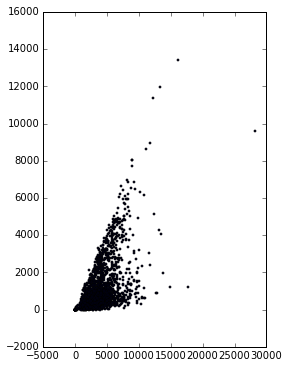

In [45]:
import matplotlib.pyplot as plt
plt.scatter(census_df['pop_total'],census_df['pop_latino'],s=3)

In [46]:
frac_latino = np.array(census_df['pop_latino'] / census_df['pop_total'])
print type(frac_latino)

<type 'numpy.ndarray'>


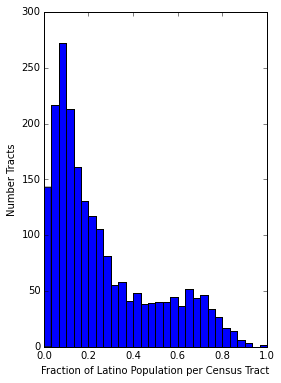

In [47]:
plt.hist(frac_latino[~np.isnan(frac_latino)],bins=30);
plt.xlabel("Fraction of Latino Population per Census Tract")
plt.ylabel("Number Tracts")

In [48]:
census_df.head(5)

,COUNTY_ID,TRACT_ID,hh_total,hh1,hh2,hh3,hh4,hh5,hh6,hh7,...,pop_filipino,pop_japanese,pop_korean,pop_vietnamese,pop_greek,pop_irish,pop_italian,pop_polish,pop_portuguese,pop_russian
0,061,000100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,061,000201,940,208,139,235,39,77,142,51,...,12,69,0,0,0,43,23,0,0,0
2,061,000202,3338,686,384,509,450,386,459,111,...,0,0,52,0,0,108,252,95,0,111
3,061,000500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,061,000600,3912,1061,608,512,389,324,496,152,...,5,78,16,73,0,77,99,271,0,67


In [49]:
census_df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
census_df.head(5)

0                   hh_total   hh1  hh2  hh3  hh4  hh5  hh6  hh7  hh8  hh9  \
COUNTY_ID TRACT_ID                                                           
061       000100           0     0    0    0    0    0    0    0    0    0   
          000201         940   208  139  235   39   77  142   51   39    0   
          000202        3338   686  384  509  450  386  459  111  218   33   
          000500           0     0    0    0    0    0    0    0    0    0   
          000600        3912  1061  608  512  389  324  496  152  250   16   

0                      ...       pop_filipino  pop_japanese  pop_korean  \
COUNTY_ID TRACT_ID     ...                                                
061       000100       ...                  0             0           0   
          000201       ...                 12            69           0   
          000202       ...                  0             0          52   
          000500       ...                  0             0           0   
          000600       ...                  5            78          16   

0                   pop_vietnamese  pop_greek  pop_irish  pop_italian  \
COUNTY_ID TRACT_ID                                                      
061       000100                 0          0          0            0   
          000201                 0          0         43           23   
          000202                 0          0        108          252   
          000500                 0          0          0            0   
          000600                73          0         77           99   

0                   pop_polish  pop_portuguese  pop_russian  
COUNTY_ID TRACT_ID                                           
061       000100             0               0            0  
          000201             0               0            0  
          000202            95               0          111  
          000500             0               0            0  
          000600           271               0           67  

[5 rows x 53 columns]

In [50]:
nyc.head(5)

USPS        GEOID    ALAND   AWATER  ALAND_SQMI  \
COUNTY_ID TRACT_ID                                                   
005       000100     NY  36005000100  1672467  1032658       0.646   
          000200     NY  36005000200   455322   926899       0.176   
          000400     NY  36005000400   912391   602945       0.352   
          001600     NY  36005001600   485079        0       0.187   
          001900     NY  36005001900  1656134  1139660       0.639   

                    AWATER_SQMI   INTPTLAT  INTPTLONG STATE STATE_ID BOROUGH  \
COUNTY_ID TRACT_ID                                                             
005       000100          0.399  40.793492 -73.883532             36   Bronx   
          000200          0.358  40.803486 -73.860438             36   Bronx   
          000400          0.233  40.808915 -73.850488             36   Bronx   
          001600          0.000  40.818848 -73.858076             36   Bronx   
          001900          0.440  40.800999 -73.909373             36   Bronx   

                       LATMIN     LATMAX    LONGMIN    LONGMAX ZIPCODE  \
COUNTY_ID TRACT_ID                                                       
005       000100    40.786087  40.800898 -73.893262 -73.873801   11370   
          000200    40.798192  40.808779 -73.867393 -73.853482   10473   
          000400    40.803373  40.814458 -73.857771 -73.843206   10473   
          001600    40.815712  40.821984 -73.862197 -73.853956   10473   
          001900    40.793470  40.808528 -73.919265 -73.899481   10455   

                    FRAC_LAND  
COUNTY_ID TRACT_ID             
005       000100     0.618259  
          000200     0.329413  
          000400     0.602105  
          001600     1.000000  
          001900     0.592366

In [51]:
nyc.columns

Index([u'USPS', u'GEOID', u'ALAND', u'AWATER', u'ALAND_SQMI', u'AWATER_SQMI', u'INTPTLAT', u'INTPTLONG', u'STATE', u'STATE_ID', u'BOROUGH', u'LATMIN', u'LATMAX', u'LONGMIN', u'LONGMAX', u'ZIPCODE', u'FRAC_LAND'], dtype='object')

In [52]:
#Drop columns with same names as in geo DF - mysql does not accept duplicate column names
census_df.columns
census_df.drop('state', axis=1, inplace=True)
census_df.drop('county', axis=1, inplace=True)
census_df.drop('tract', axis=1, inplace=True)

In [399]:
census_df.columns

Index([u'hh_total', u'hh1', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh10', u'hhmedian', u'hhmean', u'pop_total', u'pop1', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_white', u'pop_native', u'pop_pacific', u'pop_latino'], dtype='object')

In [59]:
df = nyc.join(census_df, how='inner',lsuffix="",rsuffix="")

In [60]:
len(nyc),len(census_df),len(df)

(2167, 2167, 2167)

In [61]:
import matplotlib
matplotlib.style.use('ggplot')

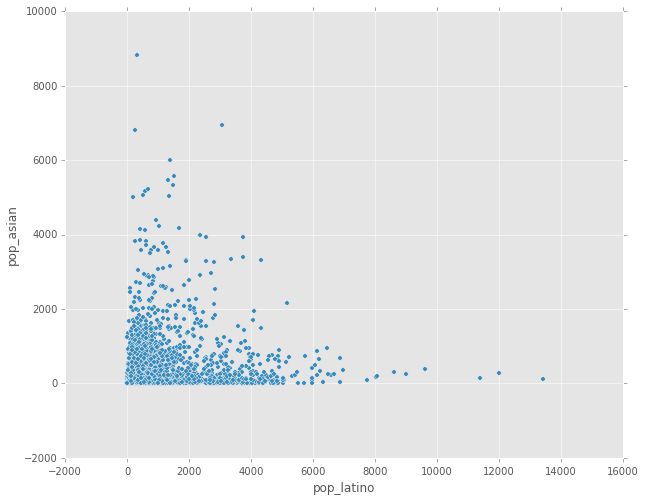

In [62]:
mpl.rcParams["figure.figsize"] = (10,8)
df.plot(kind='scatter', x='pop_latino', y='pop_asian')

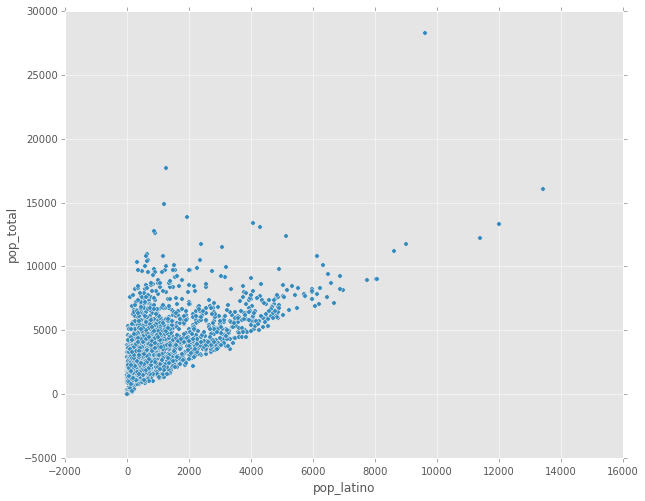

In [63]:
df.plot(kind='scatter', x='pop_latino', y='pop_total')

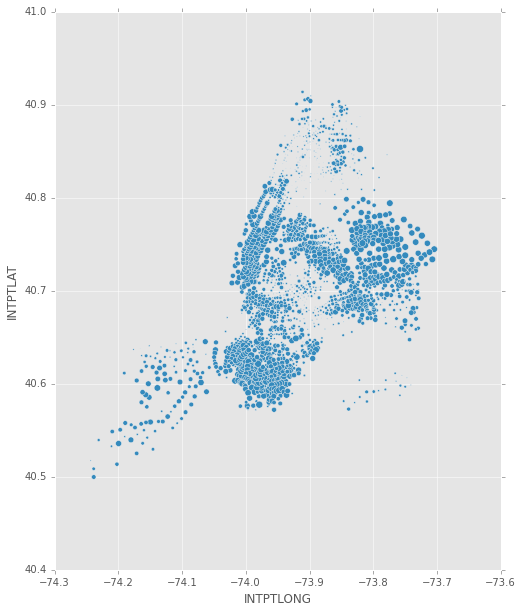

In [64]:
mpl.rcParams["figure.figsize"] = (8,10)
dfsub = df[df['pop_total'] > 0.0]  #dfsub used for plotting where pop_total > 0.0
dfsub.plot(kind='scatter', x='INTPTLONG', y='INTPTLAT',s=50*dfsub['pop_asian']/(dfsub['pop_asian']+dfsub['pop_latino']))


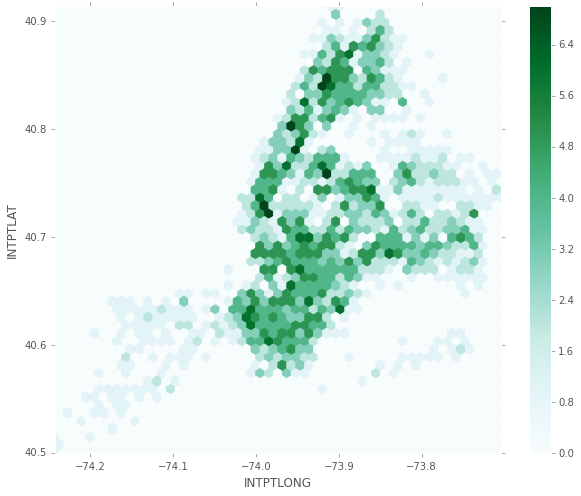

In [65]:
mpl.rcParams["figure.figsize"] = (10,8)
dfsub.plot(kind='hexbin', x='INTPTLONG', y='INTPTLAT',gridsize=50)

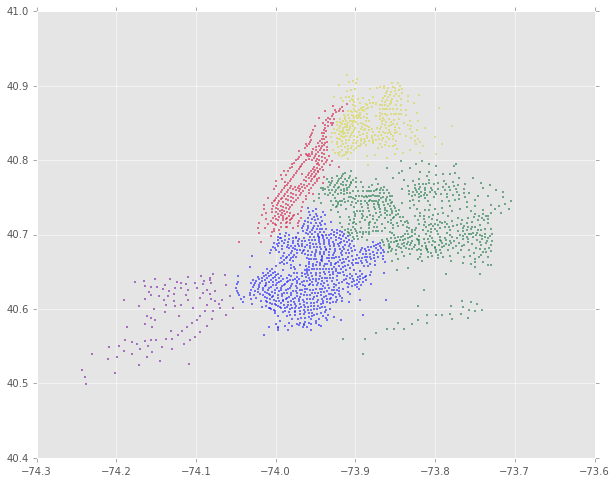

In [66]:
plt.scatter(nyc['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(nyc.ix["061"]['INTPTLONG'],nyc.ix["061"]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(nyc.ix["047"]['INTPTLONG'],nyc.ix["047"]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(nyc.ix["081"]['INTPTLONG'],nyc.ix["081"]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(nyc.ix["085"]['INTPTLONG'],nyc.ix["085"]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(nyc.ix["005"]['INTPTLONG'],nyc.ix["005"]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

###Mean vs Median Income! 

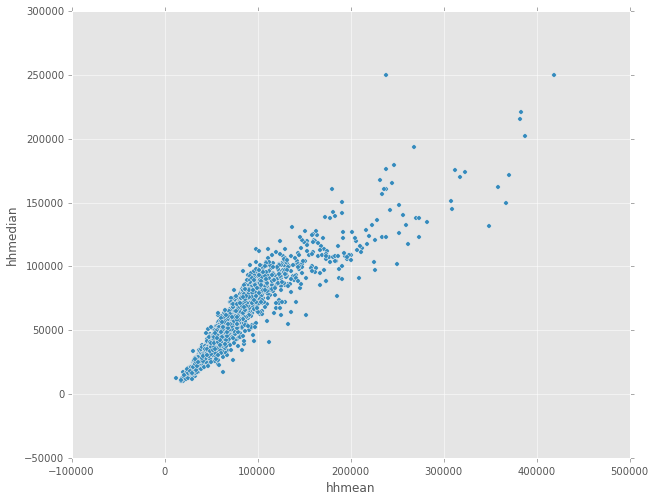

In [67]:
df.plot(kind='scatter', x='hhmean', y='hhmedian')

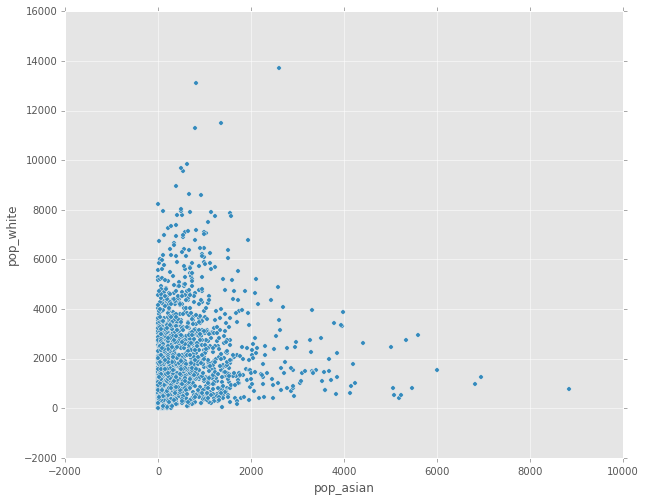

In [68]:
df.plot(kind='scatter', x='pop_asian', y='pop_white')

#SAVE CENSUS DATA to MYSQL! 

In [75]:
#df.to_json("../data/census_data.json")
#df.to_json()
df.head()

USPS        GEOID    ALAND   AWATER  ALAND_SQMI  \
COUNTY_ID TRACT_ID                                                   
005       000100     NY  36005000100  1672467  1032658       0.646   
          000200     NY  36005000200   455322   926899       0.176   
          000400     NY  36005000400   912391   602945       0.352   
          001600     NY  36005001600   485079        0       0.187   
          001900     NY  36005001900  1656134  1139660       0.639   

                    AWATER_SQMI   INTPTLAT  INTPTLONG STATE STATE_ID  \
COUNTY_ID TRACT_ID                                                     
005       000100          0.399  40.793492 -73.883532             36   
          000200          0.358  40.803486 -73.860438             36   
          000400          0.233  40.808915 -73.850488             36   
          001600          0.000  40.818848 -73.858076             36   
          001900          0.440  40.800999 -73.909373             36   

                       ...      pop_filipino  pop_japanese  pop_korean  \
COUNTY_ID TRACT_ID     ...                                               
005       000100       ...                 7             0          22   
          000200       ...                 0             0          60   
          000400       ...                12             0           2   
          001600       ...                 0             0           0   
          001900       ...                 0            23           6   

                    pop_vietnamese  pop_greek pop_irish  pop_italian  \
COUNTY_ID TRACT_ID                                                     
005       000100                 0          0        81          103   
          000200                 0          0        62           79   
          000400                 0          0        25          138   
          001600                 0          5         8           26   
          001900                 0          0        66           56   

                    pop_polish  pop_portuguese  pop_russian  
COUNTY_ID TRACT_ID                                           
005       000100            29               7           39  
          000200             0               0            0  
          000400            21               0            0  
          001600             0               0            0  
          001900             5               0            3  

[5 rows x 67 columns]

In [480]:
from pandas.io import sql
import pymysql as mdb

#con = mdb.connect('localhost', 'root', '', 'census_db',
#        unix_socket="/opt/local/var/run/mysql56/mysqld.sock") #host, user, password, #database

In [492]:
#sql.write_frame(df, con=con, name='table_census', 
#               if_exists='replace', flavor='mysql')

#df.reset_index().to_sql("table_census", con = con, flavor='mysql', schema=None, if_exists='replace')

#Test SQL table

###remember for sql access, < mysql -u root -p > 

In [494]:
#con = mdb.connect('localhost', 'root', '', 'census_db',
#        unix_socket="/opt/local/var/run/mysql56/mysqld.sock") #host, user, password, #database

#with con: 
#    cur = con.cursor()
#    cur.execute("SELECT hhmean,hhmedian,pop_total FROM table_census")
#    rows = cur.fetchall()
#    for row in rows:
#        print row

In [493]:
#Now read in to pandas from sql
#df2 = pd.read_sql("table_census", con, coerce_float=True)

In [76]:
df.reset_index().to_json("../data/census_data.json",orient="records")

In [77]:
df2 = pd.read_json("../data/census_data.json")
df2.head(5)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,COUNTY_ID,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,...,pop_mexican,pop_native,pop_pacific,pop_polish,pop_portuguese,pop_puertorican,pop_russian,pop_total,pop_vietnamese,pop_white
0,1672467,0.646,1032658,0.399,Bronx,5,0.618259,36005000100,40.793492,-73.883532,...,312,0,0,29,7,1831,39,9191,0,1361
1,455322,0.176,926899,0.358,Bronx,5,0.329413,36005000200,40.803486,-73.860438,...,120,35,0,0,0,1618,0,4858,0,1352
2,912391,0.352,602945,0.233,Bronx,5,0.602105,36005000400,40.808915,-73.850488,...,139,0,0,21,0,2416,0,5344,0,1339
3,485079,0.187,0,0.000,Bronx,5,1.000000,36005001600,40.818848,-73.858076,...,83,0,0,0,0,1878,0,5215,0,1535
4,1656134,0.639,1139660,0.440,Bronx,5,0.592366,36005001900,40.800999,-73.909373,...,525,0,0,5,0,547,3,2562,0,995


In [78]:
df2.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [79]:
df2.head()

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI BOROUGH  \
COUNTY_ID TRACT_ID                                                      
5         100       1672467       0.646  1032658        0.399   Bronx   
          200        455322       0.176   926899        0.358   Bronx   
          400        912391       0.352   602945        0.233   Bronx   
          1600       485079       0.187        0        0.000   Bronx   
          1900      1656134       0.639  1139660        0.440   Bronx   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
5         100        0.618259  36005000100  40.793492 -73.883532  40.800898   
          200        0.329413  36005000200  40.803486 -73.860438  40.808779   
          400        0.602105  36005000400  40.808915 -73.850488  40.814458   
          1600       1.000000  36005001600  40.818848 -73.858076  40.821984   
          1900       0.592366  36005001900  40.800999 -73.909373  40.808528   

                      ...      pop_mexican  pop_native  pop_pacific  \
COUNTY_ID TRACT_ID    ...                                             
5         100         ...              312           0            0   
          200         ...              120          35            0   
          400         ...              139           0            0   
          1600        ...               83           0            0   
          1900        ...              525           0            0   

                   pop_polish  pop_portuguese pop_puertorican  pop_russian  \
COUNTY_ID TRACT_ID                                                           
5         100              29               7            1831           39   
          200               0               0            1618            0   
          400              21               0            2416            0   
          1600              0               0            1878            0   
          1900              5               0             547            3   

                    pop_total  pop_vietnamese  pop_white  
COUNTY_ID TRACT_ID                                        
5         100            9191               0       1361  
          200            4858               0       1352  
          400            5344               0       1339  
          1600           5215               0       1535  
          1900           2562               0        995  

[5 rows x 67 columns]

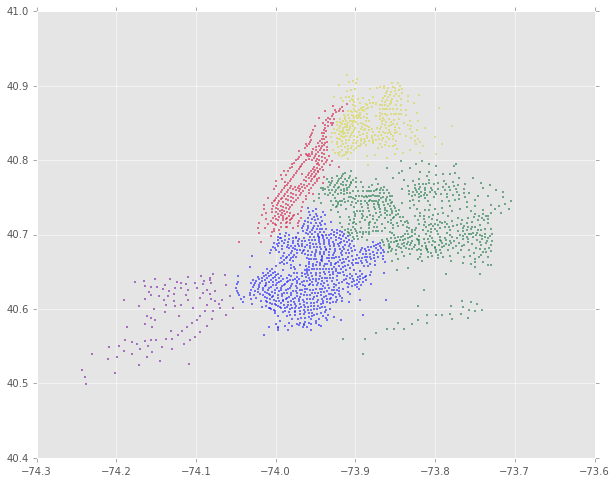

In [80]:
import matplotlib.pyplot as plt
plt.scatter(df2['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(df2.ix[61]['INTPTLONG'],df2.ix[61]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(df2.ix[47]['INTPTLONG'],df2.ix[47]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(df2.ix[81]['INTPTLONG'],df2.ix[81]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(df2.ix[85]['INTPTLONG'],df2.ix[85]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(df2.ix[5]['INTPTLONG'],df2.ix[5]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

In [81]:
df2.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'USPS', u'ZIPCODE', u'hh1', u'hh10', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh_total', u'hhmean', u'hhmedian', u'median_owned', u'median_rent', u'pop1', u'pop10', u'pop11', u'pop12', u'pop13', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_chinese', u'pop_cuban', u'pop_filipino', u'pop_greek', u'pop_indpak', u'pop_irish', u'pop_italian', u'pop_japanese', u'pop_korean', u'pop_latino', u'pop_mexican', u'pop_native', u'pop_pacific', u'pop_polish', u'pop_portuguese', u'pop_puertorican', u'pop_russian', u'pop_total', u'pop_vietnamese', u'pop_white'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c73b450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111d5bfd0>]], dtype=object)

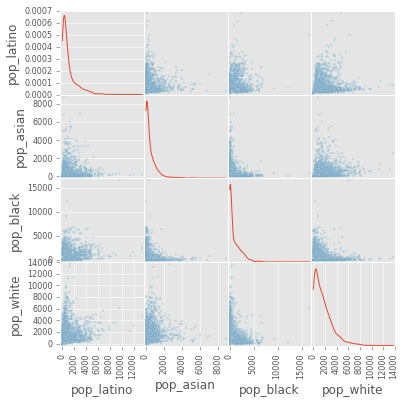

In [82]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df2[['pop_latino','pop_asian','pop_black','pop_white']], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [26]:
nyc.columns

Index([u'USPS', u'GEOID', u'ALAND', u'AWATER', u'ALAND_SQMI', u'AWATER_SQMI', u'INTPTLAT', u'INTPTLONG', u'STATE', u'STATE_ID', u'BOROUGH', u'LATMIN', u'LATMAX', u'LONGMIN', u'LONGMAX', u'ZIPCODE', u'FRAC_LAND'], dtype='object')